In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [ ]:
!unzip /content/CardPrediction.zip

Archive:  /content/CardPrediction.zip
replace CardPrediction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv('CardPrediction.csv')
data.head(5)

,Client_id,Existingcheck,Age,Gender,Dependents,Education,Marital_Status,Income_Group,Type_Card,Months,...,Months_Inactive,Contacts,Credit_Limit,Revolving_Bal,Avg_Open_To_Buy,Amount_Change,Transaction_total,Total_Txn_count,Total_Ct_Chng,Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.shape

(10127, 21)

In [ ]:
data.columns

Index(['Client_id', 'Existingcheck', 'Age', 'Gender', 'Dependents',
       'Education', 'Marital_Status', 'Income_Group', 'Type_Card', 'Months',
       'Relationship_Count', 'Months_Inactive', 'Contacts', 'Credit_Limit',
       'Revolving_Bal', 'Avg_Open_To_Buy', 'Amount_Change',
       'Transaction_total', 'Total_Txn_count', 'Total_Ct_Chng',
       'Utilization_Ratio'],
      dtype='object')

In [ ]:
data.isnull().sum()

Client_id             0
Existingcheck         0
Age                   0
Gender                0
Dependents            0
Education             0
Marital_Status        0
Income_Group          0
Type_Card             0
Months                0
Relationship_Count    0
Months_Inactive       0
Contacts              0
Credit_Limit          0
Revolving_Bal         0
Avg_Open_To_Buy       0
Amount_Change         0
Transaction_total     0
Total_Txn_count       0
Total_Ct_Chng         0
Utilization_Ratio     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


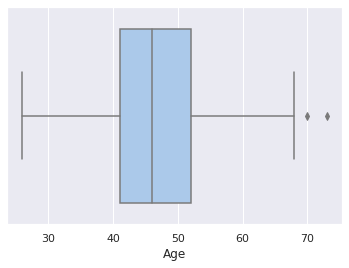

In [ ]:
sns.set_theme(style="darkgrid", palette="pastel")
sns.boxplot(data['Age'])

In [ ]:
data[['Gender', 'Credit_Limit']].groupby('Gender').agg('mean', 'count')


,Credit_Limit
Gender,
F,5023.854274
M,12685.674963


In [ ]:
datam = data.groupby('Type_Card')
datam['Age'].max()

Type_Card
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Age, dtype: int64

In [ ]:
datam['Age'].min()

Type_Card
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Age, dtype: int64

In [ ]:
datam['Utilization_Ratio'].mean()

Type_Card
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Utilization_Ratio, dtype: float64

In [ ]:
data['Existingcheck'].value_counts()


Existing Customer    8500
Attrited Customer    1627
Name: Existingcheck, dtype: int64

In [ ]:
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
def labelen(a):
  l = preprocessing.LabelEncoder()
  l.fit(a)
  print(a.name, l.classes_)
  return l.transform(a)

In [ ]:
data['Income_Group'] = labelen(data['Income_Group'])
data['Education'] = labelen(data['Education'])
data['Marital_Status'] = labelen(data['Marital_Status'])
data['Existingcheck'] = labelen(data['Existingcheck'])
data['Gender'] = labelen(data['Gender'])
data['Type_Card'] = labelen(data['Type_Card'])

data.head(5)

Income_Group ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Education ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status ['Divorced' 'Married' 'Single' 'Unknown']
Existingcheck ['Attrited Customer' 'Existing Customer']
Gender ['F' 'M']
Type_Card ['Blue' 'Gold' 'Platinum' 'Silver']


,Client_id,Existingcheck,Age,Gender,Dependents,Education,Marital_Status,Income_Group,Type_Card,Months,...,Months_Inactive,Contacts,Credit_Limit,Revolving_Bal,Avg_Open_To_Buy,Amount_Change,Transaction_total,Total_Txn_count,Total_Ct_Chng,Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.describe()

,Client_id,Existingcheck,Age,Gender,Dependents,Education,Marital_Status,Income_Group,Type_Card,Months,...,Months_Inactive,Contacts,Credit_Limit,Revolving_Bal,Avg_Open_To_Buy,Amount_Change,Transaction_total,Total_Txn_count,Total_Ct_Chng,Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,0.179816,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,0.693039,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,0.000000,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,...,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


(10127, 21)

In [ ]:
y = data['Type_Card']
X = data.drop(['Client_id', 'Type_Card'], axis = 1)


In [ ]:
data.shape

(10127, 21)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train.shape

(8101, 19)

In [ ]:
y_test.shape

(2026,)

In [ ]:
y_train.shape

(8101,)

In [ ]:
X_test.shape

(2026, 19)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
m = RandomForestClassifier(n_estimators = 300, n_jobs= -1)
m.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [ ]:
y_pred = m.predict(X_test)

In [ ]:
y_pred.shape

(8101,)

In [ ]:
y_test.shape

(2026,)

In [ ]:
accuracy_score(y_test, y_pred)

0.9565646594274433